## **`Business Problem`: A subscription-based service company wants to predict which customers are likely to cancel their subscriptions so they can take proactive measures to retain them.**

## **`Dataset`: [Telco Customer Churn Prediction Kaggle dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)** 

In [164]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import pylab

import warnings
warnings.filterwarnings('ignore')

In [165]:
# reading the dataset
df = pd.read_csv('../../data/raw/Telco-Customer-Churn.csv')

In [166]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [167]:
# getting last 5 dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [168]:
# checking number of rows and columns available in the dataset
df.shape

(7043, 21)

In [169]:
# it is used in "`series`" to return the number of rows
# in dataframe it'll return the number of rows "`multiplied`" by number of columns
df.size

147903

In [170]:
df.ndim

2

In [171]:
# listing all the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [172]:
# checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [173]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [174]:
# checking for detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [175]:
# extracting numerical features names
numerical_features = []

for feature in df.select_dtypes(include=['int64', 'float64']):
    numerical_features.append(feature)

print(f'Numerical features are: {numerical_features}')

Numerical features are: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [176]:
# extracting categorical features names
categorical_features = []

for feature in df.select_dtypes(include=['object', 'category']):
    categorical_features.append(feature)
    
print(f'Categorical features are: {categorical_features}')

Categorical features are: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [177]:
# statistical analysis on numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [178]:
# statistical analysis on categorical features
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [179]:
# checking if the target column is balanced or imbalanced data
total_records_in_dataset = 7043
total_number_of_a_class_in_target_feature = 5147

another_class_in_target_column = total_records_in_dataset - total_number_of_a_class_in_target_feature

print(f"In target feature class A: {total_number_of_a_class_in_target_feature} and class B: {another_class_in_target_column}")
print('So this is considered as `Imbalanced dataset`')

In target feature class A: 5147 and class B: 1896
So this is considered as `Imbalanced dataset`


In [180]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [181]:
# styling plots backgrounds
plt.style.available

plt.style.use( 'tableau-colorblind10' )

- find the outlier in statistical and visualized way
- find the skewness of numerical columns - `0(symmetric), >0(positevly skewd), <0(negatevely skewd)`
- find the kurtosis of numerical columns - `=3()(Mesokurtic/normal), >3(leptokurtic/positive), <3(platykurtic/negative)`
- find the covariance - `cov()`

In [182]:

df['SeniorCitizen'].skew() # positevely skewed

np.float64(1.8336327440928564)

In [183]:
# instead of give 0, 0 gives 0.
df['SeniorCitizen'].mode().squeeze()

np.int64(0)

Text(0.5, 1.0, 'Skewness of "SeniorCitizen" - Right Skewed')

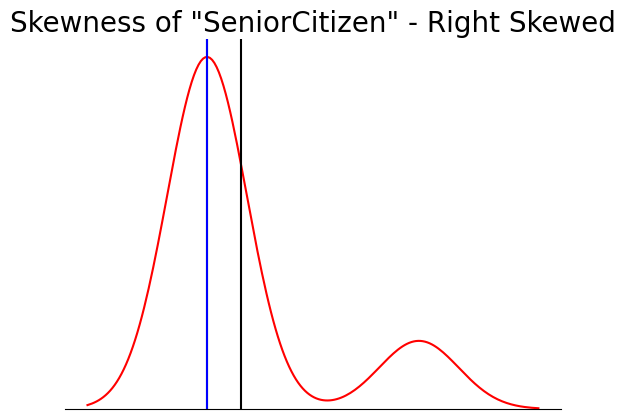

In [184]:
sns.kdeplot(x = df['SeniorCitizen'], bw_adjust=3, color='red')

sns.despine(top=True, right=True, left=True) # removes the box

plt.xticks([])
plt.yticks([])  # this 4 will removes the values
plt.ylabel("")
plt.xlabel("")

mean_value = df['SeniorCitizen'].mean()
median_value = df['SeniorCitizen'].median()
mode_value = df['SeniorCitizen'].mode().squeeze()

# verticle line
plt.axvline(mean_value, label = 'Mean', color = 'black')
plt.axvline(median_value, label = 'Median', color = 'green')
plt.axvline(mode_value, label = 'Mode', color = 'blue')

plt.title('Skewness of "SeniorCitizen" - Right Skewed',  fontdict=dict(fontsize=20))

Text(0.5, 1.0, 'Histogram of Skewed Data')

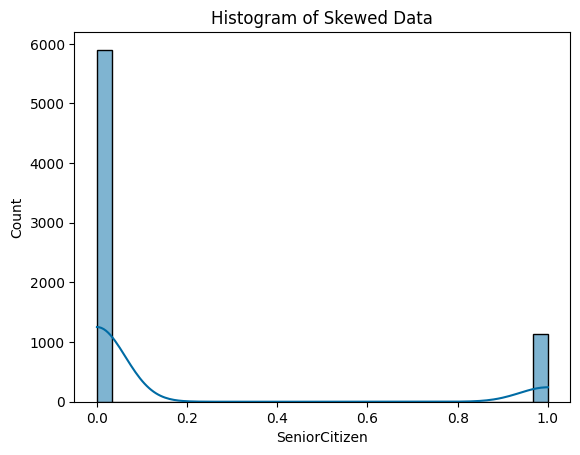

In [185]:
sns.histplot(df['SeniorCitizen'], kde=True, bins=30)
plt.title("Histogram of Skewed Data")

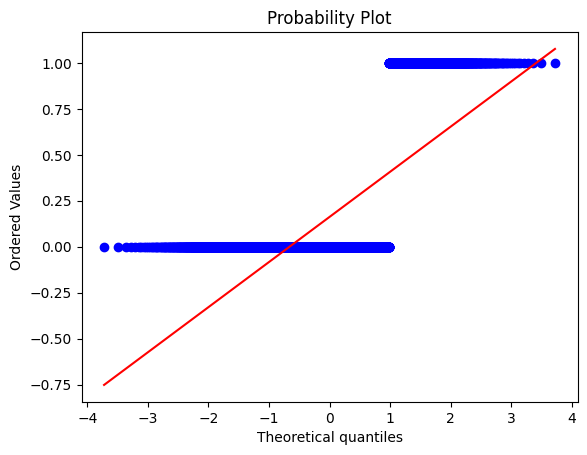

In [186]:
stats.probplot(df['SeniorCitizen'], dist="norm", plot=pylab)
plt.show()

In [187]:
df['SeniorCitizen'].kurt()

np.float64(1.3625958957939108)

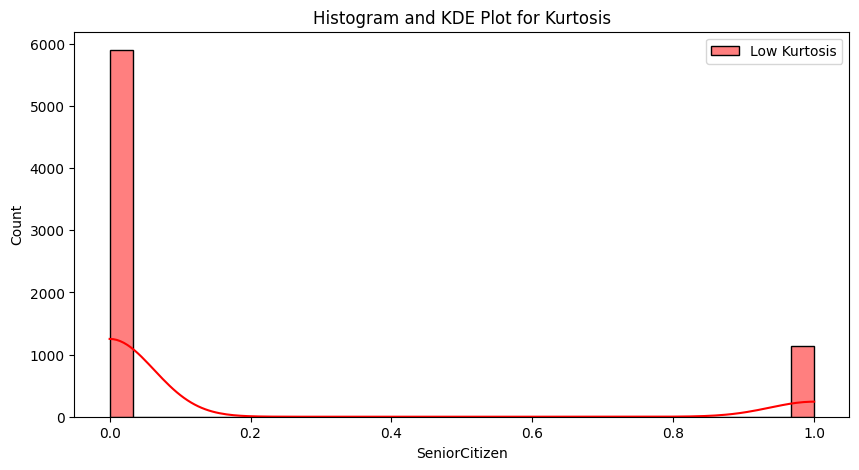

In [188]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SeniorCitizen'], kde=True, color='red', label="Low Kurtosis", bins=30)
plt.legend()
plt.title("Histogram and KDE Plot for Kurtosis")
plt.show()

In [189]:
df['tenure'].skew() # positive

np.float64(0.2395397495619829)

Text(0.5, 1.0, 'Skewness of "Tenure" - Right Skewed')

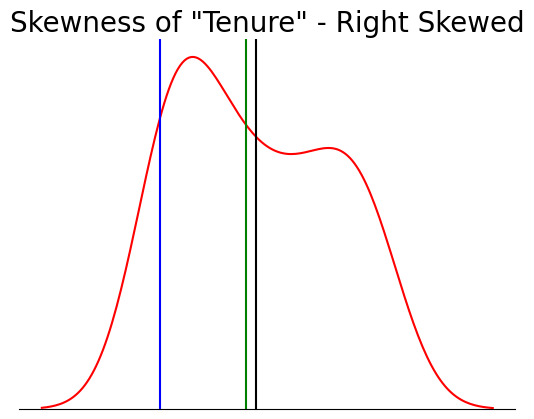

In [190]:
sns.kdeplot(x = df['tenure'], bw_adjust=3, color='red')

sns.despine(top=True, right=True, left=True) # removes the box

plt.xticks([])
plt.yticks([])  # this 4 will removes the values
plt.ylabel("")
plt.xlabel("")

mean_value = df['tenure'].mean()
median_value = df['tenure'].median()
mode_value = df['tenure'].mode().squeeze()

# verticle line
plt.axvline(mean_value, label = 'Mean', color = 'black')
plt.axvline(median_value, label = 'Median', color = 'green')
plt.axvline(mode_value, label = 'Mode', color = 'blue')

plt.title('Skewness of "Tenure" - Right Skewed',  fontdict=dict(fontsize=20))

In [191]:
df['tenure'].kurt()

np.float64(-1.387371635971685)

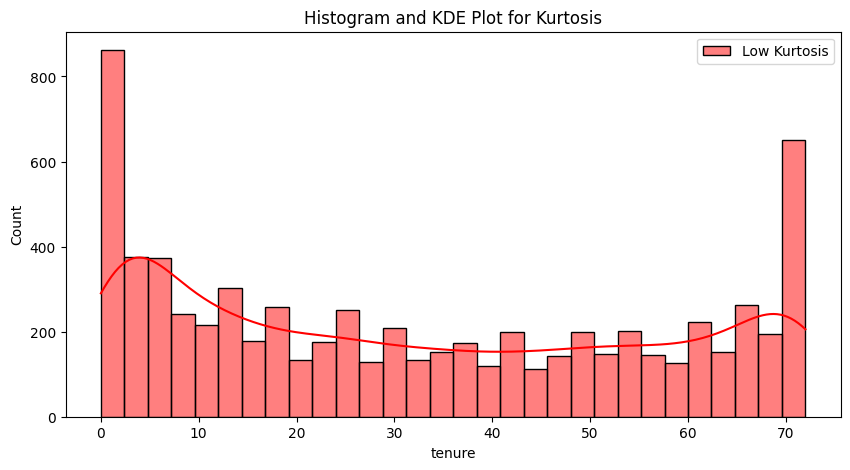

In [192]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], kde=True, color='red', label="Low Kurtosis", bins=30)
plt.legend()
plt.title("Histogram and KDE Plot for Kurtosis")
plt.show()

In [193]:
df['MonthlyCharges'].skew() # negative

np.float64(-0.22052443394398033)

Text(0.5, 1.0, 'Skewness of "MonthlyCharges" - Left Skewed')

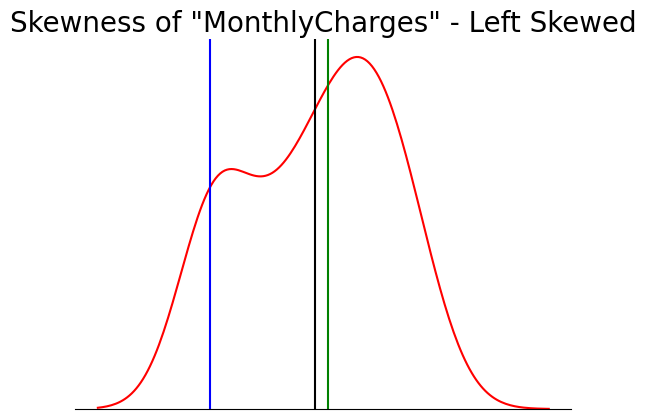

In [194]:
sns.kdeplot(x = df['MonthlyCharges'], bw_adjust=3, color='red')

sns.despine(top=True, right=True, left=True) # removes the box

plt.xticks([])
plt.yticks([])  # this 4 will removes the values
plt.ylabel("")
plt.xlabel("")

mean_value = df['MonthlyCharges'].mean()
median_value = df['MonthlyCharges'].median()
mode_value = df['MonthlyCharges'].mode().squeeze()

# verticle line
plt.axvline(mean_value, label = 'Mean', color = 'black')
plt.axvline(median_value, label = 'Median', color = 'green')
plt.axvline(mode_value, label = 'Mode', color = 'blue')

plt.title('Skewness of "MonthlyCharges" - Left Skewed',  fontdict=dict(fontsize=20))

In [195]:
df['MonthlyCharges'].kurt()

np.float64(-1.2572596945495056)

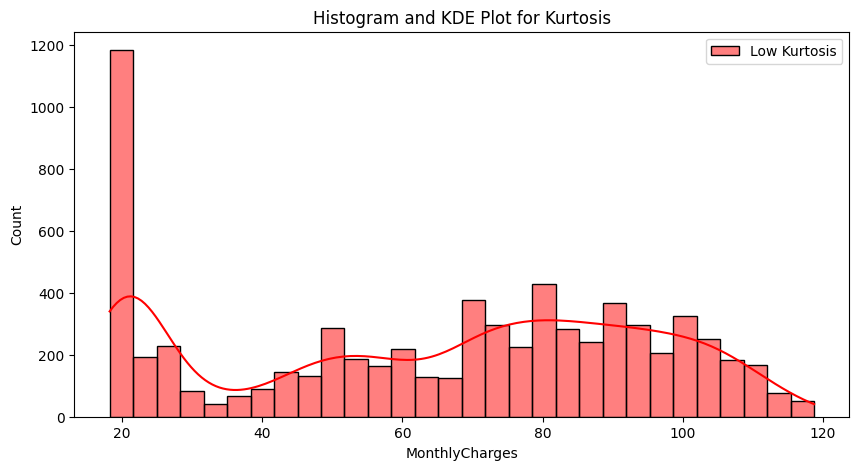

In [196]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], kde=True, color='red', label="Low Kurtosis", bins=30)
plt.legend()
plt.title("Histogram and KDE Plot for Kurtosis")
plt.show()

In [197]:
# outliers in stats approach - zscore
Z_score_seniorCitizen = stats.zscore(df['SeniorCitizen'])
outliers_in_seniorCitizen = df[np.abs(Z_score_seniorCitizen) > 3]

Z_score_tenure = stats.zscore(df['tenure'])
outliers_in_tenure = df[np.abs(Z_score_tenure) > 3]

Z_score_MonthlyCharges = stats.zscore(df['MonthlyCharges'])
outliers_in_monthlyCharges = df[np.abs(Z_score_MonthlyCharges) > 3]

print(outliers_in_seniorCitizen)
print(outliers_in_tenure)
print(outliers_in_monthlyCharges)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

In [198]:
# iqr
q1 = df['SeniorCitizen'].quantile(0.25)
q3 = df['SeniorCitizen'].quantile(0.75)

iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q1 + 1.5 * iqr

lb

np.float64(0.0)

In [199]:
ub

np.float64(0.0)

<Axes: ylabel='SeniorCitizen'>

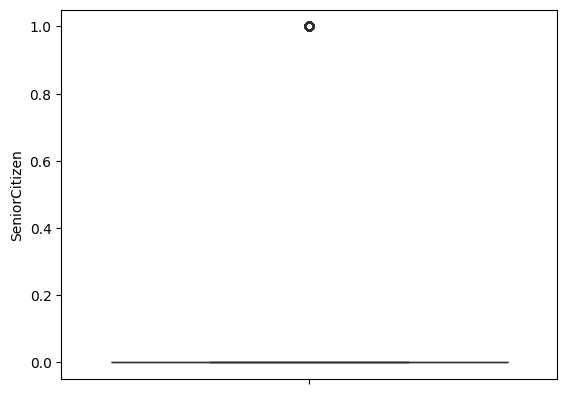

In [200]:
sns.boxplot(df['SeniorCitizen'])

<Axes: ylabel='tenure'>

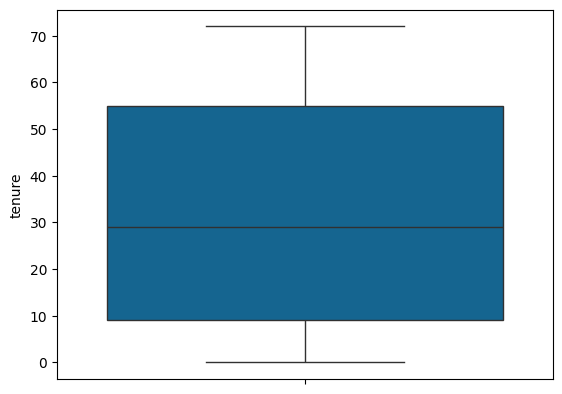

In [201]:
sns.boxplot(df['tenure'])

<Axes: ylabel='MonthlyCharges'>

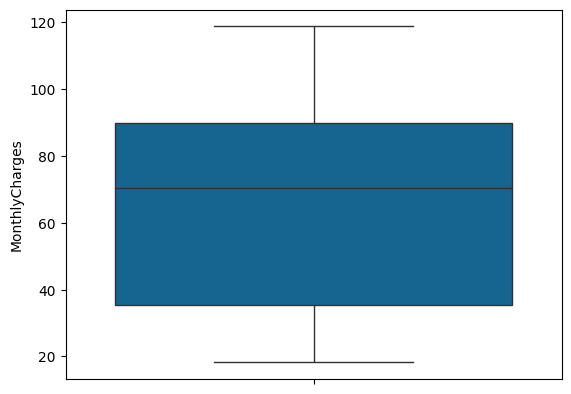

In [202]:
sns.boxplot(df['MonthlyCharges'])

## **Observations**:
1. There is toatal of `7043 records(row)` and `21 features(columns)` available in the dataset.
2. There is `Null` and `Duplicate` values in the dataset.

3. These are the columns available in the dataset with info:
    - `customerID` - Customer unique ID
    - `gender` - wheather the customer is `male` or `female`
    - `SeniorCitizen` - Whether the customer is a senior citizen or not `(1, 0)`
    - `Partner` - Whether the customer has a partner or not `(Yes, No)`
    - `Dependent` - Whether the customer has dependents or not `(Yes, No)` - people who are relying on them
    - `tenure` - Number of months the customer has `stayed` with the `company`
    - `PhoneService` - Whether the customer has a phone service or not `(Yes, No)`
    - `MultipleLines` - Whether the customer has multiple lines or not `(Yes, No, No phone service)`
    - `InternetServic` - Customer’s internet service provider `(DSL, Fiber optic, No)``
    - `OnlineSecurity` - Whether the customer has online security or not `(Yes, No, No internet service)`
    - `OnlineBackup` - Whether the customer has online backup or not `(Yes, No, No internet service)`
    - `DeviceProtection` - Whether the customer has device protection or not `(Yes, No, No internet service)`
    - `TechSuppor` - Whether the customer has tech support or not `(Yes, No, No internet service)`
    - `StreamingTV` - Whether the customer has streaming TV or not `(Yes, No, No internet service)`
    - `StreamingMovies` - Whether the customer has streaming movies or not `(Yes, No, No internet service)`
    - `Contract` - The contract term of the customer `(Month-to-month, One year, Two year)`
    - `PaperlessBillin` - Whether the customer has paperless billing or not `(Yes, No)`
    - `PaymentMethod` - The customer’s payment method `(Electronic check, Mailed check, Bank transfer (automatic), Credit card`
    - `MonthlyCharges` - The amount `charged to the customer monthly`
    - `TotalCharges` - The `total amount charged to the customer`
    - `Churn`  - Whether the customer churned or not `(Yes or No)` - "`Target Column`"

4. In the entire dataset there `3 numerical features` and `18 catrgorical features` available
5. Numerical features are:
    - `SeniorCitizen`,
    - `tenure`,
    - `MonthlyCharge`
6. Categorical features are:
    - `customerID`, `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `TotalCharges`, `Churn`
7. Total `count` in each features is `7043` which says that there is `no null values`
8. 1. **SeniorCitizen** column/feature - binary class(has two options- 0, 1):
        - `Average of 16.2%` of `customers` in the company are `senior citizens`.
        - When there is binary class standard devation doesn't make sense - cause it doesn't tells about the spread of the data from the mean, But we can say `low standard devaiation from mean` - 0.36.
        - Minimum number - 0
        - All the percentiles(25, 50, 75) are `0` - cause most of the customers in the company are `not senior citizens`.
        - Maximum number - 1
   2. **Tenure** - How long the customer has been with the company
        - `Average of 32.4 months customers` have been with using the companies services.
        - Customer tenure varies quite a bit `(±24.6 months) `from the average
        - Some customers are `brand new (0 months)` to the company
        - A `quarter of customers have been with the service for 9 months or less`
        - `Half of customers` have been `with the service for 29 months or less`
        - `Three-quarters `of customers `have been with the service for 55 months or less`
        - The `longest-tenured customer` `has been with the service for 72 months (6 years)`
    3. **MonthlyCharges**:
        - The `average monthly charge is about $64.76`
        - Monthly charges also `vary significantly (±$30.09)`
        - The `lowest monthly charge is $18.25`
        - A `quarter` of `customers pay $35.50 or less`
        - `Half` of customers `pay $70.35 or less`
        - `Three-quarters` of customers `pay $89.85 or less`
        - The `highest` monthly charge is `$118.75`
9. Most of the features has unique values `of 2, 3 and 4.`
10. Target feature/column is - `Churn` : `which has Imbalanced data cause from the toatal record of 7043`, In churn feature `NO` class has `5174` values and `YES` class has `1869` values which clearly says that the `data is imbalanced` if we `trained the model` it will automatically `favours the Majority(In our case `NO`)`
11. Ther is no outliers in first 3 `numerical features`
12. All 3 columns has `negative and positive` `skewness and kurtosis`
13. 

# **TODO:- Univariate, Bivariate, Multivariate Analysis**

In [203]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- `Dropping customerId column` cause `doesn't help in analysis` other than `merging dataset, finding unique id in datset, finding duplicates.`

In [204]:
# dontn want to make changes in raw data
copy_df = df.copy()

In [205]:
copy_df.drop(columns=['customerID'], axis = 1, inplace = True)

In [206]:
copy_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [207]:
# umber of unique values in each column
copy_df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [208]:
copy_df.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
Male    0              No       No          1       Yes           No                No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  No                Mailed check               20.05           20.05         No       3
                                                                                                                                                                                                                                                                                                20.20           20.2          No       3
Female  0         

In [244]:
# TODO
# go through each features classes and understand as per its explaination - why it is
# handle ' ' - empty value in totalcharges column, and convert this into 'float64'
# modify class name if needed and combine if needed
# come up with questions for each columns
# come up with questions for 2 columns
# come up with questions for 3 and more columns

# ------- the end of descriptive stats.

# next step inferential stats and conclution by doing stat and probability tests